In [1]:
pip install tensorflow==1.14.0

     |████████████████████████████████| 109.2MB 83kB/s 
     |████████████████████████████████| 491kB 56.2MB/s 
     |████████████████████████████████| 51kB 4.9MB/s 
     |████████████████████████████████| 3.2MB 52.7MB/s 
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [1]:
pip install Keras==2.3.0


  Attempting uninstall: Keras
    Found existing installation: Keras 2.3.1
    Uninstalling Keras-2.3.1:
      Successfully uninstalled Keras-2.3.1


In [3]:
!wget http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz
!7z x kddcup.data.gz

--2020-08-14 09:55:41--  http://kdd.ics.uci.edu/databases/kddcup99/kddcup.data.gz
Resolving kdd.ics.uci.edu (kdd.ics.uci.edu)... 128.195.1.86
Connecting to kdd.ics.uci.edu (kdd.ics.uci.edu)|128.195.1.86|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18115902 (17M) [application/x-gzip]
Saving to: ‘kddcup.data.gz’

kddcup.data.gz      100%[===================>]  17.28M  26.0MB/s    in 0.7s    

2020-08-14 09:55:42 (26.0 MB/s) - ‘kddcup.data.gz’ saved [18115902/18115902]


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs AMD EPYC 7B12 (830F10),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 18115902 bytes (18 MiB)

Extracting archive: kddcup.data.gz
--
Path = kddcup.data.gz
Type = gzip
Headers Size = 32

  0% - kddcup.data.corrected                             17% - kddcup

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
import sys
import numpy as np
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.optimizers import Adam
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Bidirectional
from keras.layers.core import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [7]:
#preparing column data
cols="""duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,
num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,
is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,
dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,
dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('label')

In [8]:
data = pd.read_csv('kddcup.data.corrected',names = columns)

In [9]:
attk = ['ftp_write.','guess_passwd.','imap.',
'multihop.','phf.','spy.','warezclient.','warezmaster.','buffer_overflow.',
'loadmodule.','perl.','rootkit.','ipsweep.','nmap.','portsweep.','satan.']

In [10]:
df = data[data['label'].isin(attk)]

In [11]:
data = data[0:100000]

In [12]:
data = pd.concat([data,df],axis=0)

In [13]:
### shape function gives the dimensions of the dataset

### View the first ten rows of the dataset

### View the Statistical Summary

### View the Label Distribution of Training and Test set



In [14]:
print(type(data))

print('Dimensions of the Data:',data.shape)

<class 'pandas.core.frame.DataFrame'>
Dimensions of the Data: (142280, 42)


In [15]:
data.head(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.
5,0,tcp,http,SF,238,1282,0,0,0,0,...,5,1.0,0.0,0.20,0.0,0.0,0.0,0.0,0.0,normal.
6,0,tcp,http,SF,235,1337,0,0,0,0,...,6,1.0,0.0,0.17,0.0,0.0,0.0,0.0,0.0,normal.
7,0,tcp,http,SF,234,1364,0,0,0,0,...,7,1.0,0.0,0.14,0.0,0.0,0.0,0.0,0.0,normal.
8,0,tcp,http,SF,239,1295,0,0,0,0,...,8,1.0,0.0,0.12,0.0,0.0,0.0,0.0,0.0,normal.
9,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.


In [16]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,142280.000000,1.422800e+05,1.422800e+05,142280.0,142280.0,142280.000000,142280.000000,142280.000000,142280.000000,142280.000000,...,142280.000000,142280.000000,142280.000000,142280.000000,142280.000000,142280.000000,142280.000000,142280.000000,142280.000000,142280.000000
mean,177.397561,3.411209e+04,1.768790e+04,0.0,0.0,0.000035,0.083195,0.000443,0.540694,0.005053,...,155.559270,185.109776,0.786201,0.173921,0.367552,0.067905,0.021211,0.021638,0.159135,0.164090
std,2296.501208,5.516246e+06,3.783556e+06,0.0,0.0,0.007014,1.410018,0.025836,0.498343,0.790983,...,110.189755,107.306465,0.399891,0.360594,0.456743,0.185349,0.097865,0.144134,0.344244,0.369989
min,0.000000,0.000000e+00,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000e+00,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,28.000000,64.000000,0.970000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.300000e+02,3.130000e+02,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.330000e+02,1.692000e+03,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.010000,1.000000,0.040000,0.000000,0.000000,0.000000,0.000000
max,42908.000000,1.379964e+09,1.309937e+09,0.0,0.0,2.000000,30.000000,5.000000,1.000000,217.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
print('Label distribution Data :')
print(data['label'].value_counts())

Label distribution Data :
normal.             77888
smurf.              22093
satan.              15892
ipsweep.            12481
portsweep.          10413
nmap.                2316
warezclient.         1020
guess_passwd.          53
buffer_overflow.       32
warezmaster.           20
neptune.               15
imap.                  12
rootkit.               10
loadmodule.            10
ftp_write.              8
multihop.               7
perl.                   4
phf.                    4
spy.                    2
Name: label, dtype: int64


In [18]:

### Step 1: Data preprocessing:

#### One-Hot-Encoding (one-of-K) is used to to transform all categorical features into binary features. 

#### Requirement for One-Hot-encoding:

"The input to this transformer should be a matrix of integers, denoting the values taken on by categorical (discrete) features. The output will be a sparse matrix where each column corresponds to one possible value of one feature. It is assumed that input features take on values in the range [0, n_values)."
 
#Therefore the features first need to be transformed with LabelEncoder, to transform every category to a number.


### Identify categorical features

#columns that are categorical and not binary yet: protocol_type (column 2), service (column 3), flag (column 4).

### explore categorical features

'The input to this transformer should be a matrix of integers, denoting the values taken on by categorical (discrete) features. The output will be a sparse matrix where each column corresponds to one possible value of one feature. It is assumed that input features take on values in the range [0, n_values).'

In [19]:
print('Categorical Features in Data :')
for col_name in data.columns:
    if data[col_name].dtypes == 'object' :
        unique_cat = len(data[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} categories".format(col_name=col_name, unique_cat=unique_cat))



Categorical Features in Data :
Feature 'protocol_type' has 3 categories
Feature 'service' has 66 categories
Feature 'flag' has 11 categories
Feature 'label' has 19 categories


In [20]:
### see how distributed the feature service, protocol_type, flag is.
### Since it is evenly distributed and therefore we need to make dummies for all.


In [21]:
print()
print('Distribution of categories in service:')
print(data['service'].value_counts().sort_values(ascending=False).head(10))



Distribution of categories in service:
http        69524
ecr_i       22331
other       15187
eco_i       12640
private     12279
smtp         5821
domain_u     1237
ftp_data      799
ftp           620
finger        409
Name: service, dtype: int64


In [22]:
print('Distribution of categories in protocol_type:')
print(data['protocol_type'].value_counts().sort_values(ascending=False).head(10))

Distribution of categories in protocol_type:
tcp     103922
icmp     34975
udp       3383
Name: protocol_type, dtype: int64


In [23]:
print('Distribution of categories in flag:')
print(data['flag'].value_counts().sort_values(ascending=False).head(10))

Distribution of categories in flag:
SF        115729
REJ        15507
RSTR        7669
S0          1953
SH          1038
RSTO         145
RSTOS0       122
S1            55
OTH           45
S2            12
Name: flag, dtype: int64


In [24]:
### Need to make dummies for all categories as the distribution is fairly even. In total: 3+70+11=84 dummies.

### LabelEncoder

### Insert categorical features into a 2D numpy array


In [25]:
categorical_columns=['protocol_type', 'service', 'flag']

# Get the categorical values into a 2D numpy array
data_categorical_values = data[categorical_columns]

data_categorical_values.head()

,protocol_type,service,flag
0,tcp,http,SF
1,tcp,http,SF
2,tcp,http,SF
3,tcp,http,SF
4,tcp,http,SF


In [26]:
### Make column names for dummies

In [27]:
# protocol type
unique_protocol=sorted(data.protocol_type.unique())
string1 = 'Protocol_type_'
unique_protocol2=[string1 + x for x in unique_protocol]
# service
unique_service=sorted(data.service.unique())
string2 = 'service_'
unique_service2=[string2 + x for x in unique_service]
# flag
unique_flag=sorted(data.flag.unique())
string3 = 'flag_'
unique_flag2=[string3 + x for x in unique_flag]
# put together
dumcols=unique_protocol2 + unique_service2 + unique_flag2
print(dumcols)


['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_remote_job', 'service_rje', 'servic

In [28]:
### Transform categorical features into numbers using LabelEncoder()


In [29]:
data_categorical_values_enc=data_categorical_values.apply(LabelEncoder().fit_transform)
print(data_categorical_values_enc.head())

   protocol_type  service  flag
0              1       24     9
1              1       24     9
2              1       24     9
3              1       24     9
4              1       24     9


In [30]:
### One-Hot-Encoding

In [31]:
enc = OneHotEncoder()
data_categorical_values_encenc = enc.fit_transform(data_categorical_values_enc)
data_cat_data = pd.DataFrame(data_categorical_values_encenc.toarray(),columns=dumcols)

data_cat_data.head()


,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
### Join encoded categorical dataframe with the non-categorical dataframe

In [33]:
newdata=data.join(data_cat_data)
newdata.drop('flag', axis=1, inplace=True)
newdata.drop('protocol_type', axis=1, inplace=True)
newdata.drop('service', axis=1, inplace=True)

In [34]:
### We have now Obtained 123 features -- Previous 42 Features + Current Encoded 84 Features - 3 features (flag, protocol, service)


### Split Dataset into 4 subsets for every attack category

### Replace labels column with new labels column
### Make new subsets

In [35]:
# renaming attack types
label_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
    }

In [36]:
newdata.dropna(inplace=True,axis=1)

In [37]:
newdata.label.value_counts()

normal.             77888
smurf.              22093
satan.              15892
ipsweep.            12481
portsweep.          10413
nmap.                2316
warezclient.         1020
guess_passwd.          53
buffer_overflow.       32
warezmaster.           20
neptune.               15
imap.                  12
rootkit.               10
loadmodule.            10
ftp_write.              8
multihop.               7
perl.                   4
phf.                    4
spy.                    2
Name: label, dtype: int64

In [38]:
#Replacing label types
newdata['label'] = newdata.label.apply(lambda r:label_types[r[:-1]])

In [39]:
newdata['label'].value_counts()

normal    77888
probe     41102
dos       22108
r2l        1126
u2r          56
Name: label, dtype: int64

In [40]:
newdata['label'].value_counts()

normal    77888
probe     41102
dos       22108
r2l        1126
u2r          56
Name: label, dtype: int64

In [41]:
l_enc = LabelEncoder()
labels = newdata['label']
newdata['label'] = l_enc.fit_transform(labels)

In [42]:
l_enc.classes_

array(['dos', 'normal', 'probe', 'r2l', 'u2r'], dtype=object)

In [43]:
to_drop_DoS = [2,3,4]
to_drop_Probe = [0,3,4]
to_drop_R2L = [0,2,4]
to_drop_U2R = [0,2,3]
DoS_df=newdata[~newdata['label'].isin(to_drop_DoS)];
Probe_df=newdata[~newdata['label'].isin(to_drop_Probe)];
R2L_df=newdata[~newdata['label'].isin(to_drop_R2L)];
U2R_df=newdata[~newdata['label'].isin(to_drop_U2R)];

print('DATA :')
print('Dimensions of DoS:' ,DoS_df.shape)
print('Dimensions of Probe:' ,Probe_df.shape)
print('Dimensions of R2L:' ,R2L_df.shape)
print('Dimensions of U2R:' ,U2R_df.shape)



DATA :
Dimensions of DoS: (99996, 39)
Dimensions of Probe: (118990, 39)
Dimensions of R2L: (79014, 39)
Dimensions of U2R: (77944, 39)


In [44]:
DoS_df['label'].value_counts()

1    77888
0    22108
Name: label, dtype: int64

In [45]:
Probe_df['label'].value_counts()

1    77888
2    41102
Name: label, dtype: int64

In [46]:
R2L_df['label'].value_counts()

1    77888
3     1126
Name: label, dtype: int64

In [47]:
U2R_df['label'].value_counts()

1    77888
4       56
Name: label, dtype: int64

In [48]:
X_DoS = DoS_df.drop('label',1)
Y_DoS = DoS_df.label
X_Probe = Probe_df.drop('label',1)
Y_Probe = Probe_df.label
X_R2L = R2L_df.drop('label',1)
Y_R2L = R2L_df.label
X_U2R = U2R_df.drop('label',1)
Y_U2R = U2R_df.label

In [49]:
z = pd.DataFrame(Y_R2L)

In [50]:
Y_R2L.value_counts()

1    77888
3     1126
Name: label, dtype: int64

In [51]:
### Use StandardScaler() to scale the dataframes


In [52]:
scaler1 = preprocessing.StandardScaler().fit(X_DoS)
X_DoS=scaler1.transform(X_DoS) 
scaler2 = preprocessing.StandardScaler().fit(X_Probe)
X_Probe=scaler2.transform(X_Probe) 
scaler3 = preprocessing.StandardScaler().fit(X_R2L)
X_R2L=scaler3.transform(X_R2L) 
scaler4 = preprocessing.StandardScaler().fit(X_U2R)
X_U2R=scaler4.transform(X_U2R) 

In [53]:
### Check that the Standard Deviation is 1

In [54]:

print(X_DoS.std(axis=0))

print(X_Probe.std(axis=0))
print(X_R2L.std(axis=0))
print(X_U2R.std(axis=0))

[1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Dimensionality Redution

In [55]:
pca_dos = PCA(n_components = 0.99)
X_DoS_reduced = pca_dos.fit_transform(X_DoS)
print(pca_dos.n_components_)
n = pca_dos.n_components_
print(pca_dos.explained_variance_*10)

25
[46.30746652 40.28858889 36.02916898 27.37502448 24.34016173 18.74356593
 17.20984086 15.13668524 14.55221784 11.32646657  9.99962273  9.24034629
  8.89819768  8.71042996  7.45767885  6.82820341  6.39869159  5.80153723
  5.37985087  4.27877468  3.89087173  3.12148604  2.44192586  2.03568511
  1.87866584]


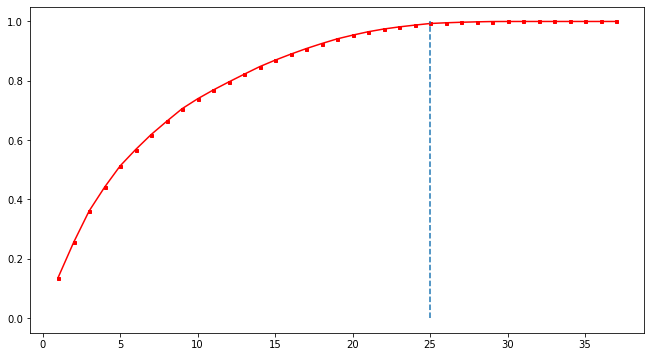

In [56]:
reg=[]
for n_components in range(1,X_DoS.shape[1]):
    
    pca = PCA(n_components = n_components)
    pca.fit(X_DoS)
    reg.append(np.sum(pca.explained_variance_ratio_))
 
x = [i for i in range(1,X_DoS.shape[1])] 
plt.figure(figsize=(11,6))
plt.plot(x,reg,'-s',color='r',markersize=3)

plt.plot([n,n],[0,1],'--')
plt.show()


In [57]:
pca_Probe = PCA(n_components = 0.99)
X_Probe_reduced = pca_Probe.fit_transform(X_Probe)
print(pca_Probe.n_components_)
n = pca_Probe.n_components_
print(pca_Probe.explained_variance_*10)

24
[96.17378934 31.98924766 30.57938111 25.4799925  18.23302805 14.94836216
 13.40992702 10.80964476 10.1568517   9.9986082   9.94872462  9.3237088
  8.54383377  7.90214181  7.26659513  6.58138369  5.74488228  5.35128719
  4.09634656  2.95491894  2.23351145  2.16349815  1.87617393  1.13555137]


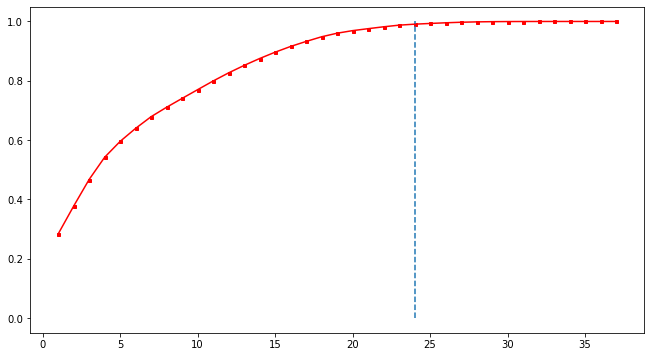

In [58]:
reg=[]
for n_components in range(1,X_Probe.shape[1]):
    
    pca = PCA(n_components = n_components)
    pca.fit(X_Probe)
    reg.append(np.sum(pca.explained_variance_ratio_))

x = [i for i in range(1,X_DoS.shape[1])] 
plt.figure(figsize=(11,6))
plt.plot(x,reg,'-s',color='r',markersize=3)

plt.plot([n,n],[0,1],'--')
plt.show()


In [59]:
pca_R2L = PCA(n_components = 0.99)
X_R2L_reduced = pca_R2L.fit_transform(X_R2L)
print(pca_R2L.n_components_)
n= pca_R2L.n_components_
print(pca_R2L.explained_variance_*10)

27
[44.67000649 35.55810592 31.9121956  22.6781084  22.13314003 19.59142572
 15.81168886 15.02274683 12.70681808 11.86461485 10.39297266 10.2107422
  9.36454498  8.51786117  8.19677886  7.8277375   7.44061387  7.3315114
  6.7929552   6.06644678  5.10978236  4.27722176  3.91357912  3.88846746
  2.56096316  2.17567142  1.55836203]


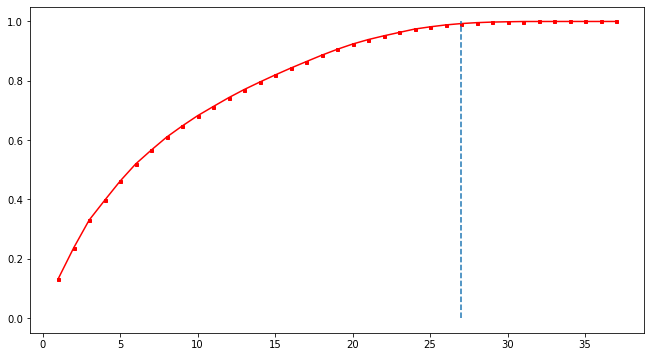

In [60]:
reg=[]
for n_components in range(1,X_R2L.shape[1]):
    
    pca = PCA(n_components = n_components)
    pca.fit(X_R2L)
    reg.append(np.sum(pca.explained_variance_ratio_))
 
x = [i for i in range(1,X_DoS.shape[1])] 
plt.figure(figsize=(11,6))
plt.plot(x,reg,'-s',color='r',markersize=3)

plt.plot([n,n],[0,1],'--')
plt.show()


In [61]:
pca_U2R = PCA(n_components = 0.99)
X_U2R_reduced = pca_U2R.fit_transform(X_U2R)
print(pca_U2R.n_components_)
n= pca_U2R.n_components_
print(pca_U2R.explained_variance_*10)

27
[41.19300779 35.6733651  31.86008734 21.25368246 19.05768741 18.76791038
 17.51167409 15.71773199 14.44646242 13.44542154 10.47546788  9.84452894
  9.4562496   9.02344405  8.76148438  8.50939002  8.39723988  7.42389486
  6.41833522  6.23561781  6.0527719   4.39593028  3.30384302  3.14406485
  2.47832978  2.06410419  1.80004663]


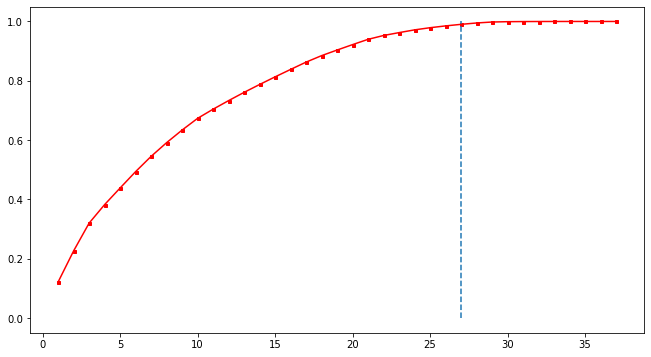

In [62]:
reg=[]
for n_components in range(1,X_U2R.shape[1]):

    pca = PCA(n_components = n_components)
    pca.fit(X_U2R)
    reg.append(np.sum(pca.explained_variance_ratio_))
 
x = [i for i in range(1,X_DoS.shape[1])] 
plt.figure(figsize=(11,6))
plt.plot(x,reg,'-s',color='r',markersize=3)

plt.plot([n,n],[0,1],'--')
plt.show()


### Building model  1.CNN model 2.LSTM  3.CONV-LSTM 

In [63]:
n_steps= 1
n_outputs = 2
epochs= 15
verbose = 1 
batch_size = 4

In [64]:
x = [i for i in range(1,epochs+1)]

In [65]:
def plot_accuracy(x,history_cnn,history_lstm,history_conv):
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.title("Accuracy comparison")
    plt.plot(x,history_cnn.history['accuracy'],label='CNN')
    plt.plot(x,history_lstm.history['accuracy'],label='LSTM')
    plt.plot(x,history_conv.history['accuracy'],label='CONV-LSTM')
    plt.legend()
    plt.subplot(122)
    plt.title("Val_Accuracy comparison")
    plt.plot(x,history_cnn.history['val_accuracy'],label='CNN')
    plt.plot(x,history_lstm.history['val_accuracy'],label='LSTM')
    plt.plot(x,history_conv.history['val_accuracy'],label='CONV-LSTM')
    plt.legend()
    plt.show()

In [66]:
def plot_loss(x,history_cnn,history_lstm,history_conv):
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.title("LOSS comparison")
    plt.plot(x,history_cnn.history['loss'],label='CNN')
    plt.plot(x,history_lstm.history['loss'],label='LSTM')
    plt.plot(x,history_conv.history['loss'],label='CONV-LSTM')
    plt.legend()
    plt.subplot(122)
    plt.title("VAL_LOSS comparison")
    plt.plot(x,history_cnn.history['val_loss'],label='CNN')
    plt.plot(x,history_lstm.history['val_loss'],label='LSTM')
    plt.plot(x,history_conv.history['val_loss'],label='CONV-LSTM')
    plt.legend()
    plt.show()

In [67]:
def plot_precision(x,history_cnn,history_lstm,history_conv):
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.title("PRECISION comparison")
    plt.plot(x,history_cnn.history['precision'],label='CNN')
    plt.plot(x,history_lstm.history['precision'],label='LSTM')
    plt.plot(x,history_conv.history['precision'],label='CONV-LSTM')
    plt.legend()
    plt.subplot(122)
    plt.title("VAL_PRECISION comparison")
    plt.plot(x,history_cnn.history['val_precision'],label='CNN')
    plt.plot(x,history_lstm.history['val_precision'],label='LSTM')
    plt.plot(x,history_conv.history['val_precision'],label='CONV-LSTM')
    plt.legend()
    plt.show()

In [68]:
def plot_f1score(x,history_cnn,history_lstm,history_conv):
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.title("F1_SCORE comparison")
    plt.plot(x,history_cnn.history['f1_score'],label='CNN')
    plt.plot(x,history_lstm.history['f1_score'],label='LSTM')
    plt.plot(x,history_conv.history['f1_score'],label='CONV-LSTM')
    plt.legend()
    plt.subplot(122)
    plt.title("VAL_F1_SCORE comparison")
    plt.plot(x,history_cnn.history['val_f1_score'],label='CNN')
    plt.plot(x,history_lstm.history['val_f1_score'],label='LSTM')
    plt.plot(x,history_conv.history['val_f1_score'],label='CONV-LSTM')
    plt.legend()
    plt.show()

In [69]:
def plot_recall(x,history_cnn,history_lstm,history_conv):
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plt.title("RECALL comparison")
    plt.plot(x,history_cnn.history['recall'],label='CNN')
    plt.plot(x,history_lstm.history['recall'],label='LSTM')
    plt.plot(x,history_conv.history['recall'],label='CONV-LSTM')
    plt.legend()
    plt.subplot(122)
    plt.title("VAL_RECALL comparison")
    plt.plot(x,history_cnn.history['val_recall'],label='CNN')
    plt.plot(x,history_lstm.history['val_recall'],label='LSTM')
    plt.plot(x,history_conv.history['val_recall'],label='CONV-LSTM')
    plt.legend()
    plt.show()

In [70]:
# Wrapper for turning tensorflow metrics into keras metrics 

def as_keras_metric(method):
    import functools
    from keras import backend as K
    @functools.wraps(method)
    def wrapper(self, args, **kwargs):
        value, update_op = method(self, args, **kwargs)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([update_op]):
            value = tf.identity(value)
        return value
    return wrapper

# defining precision ,recall abd f_score
precision = as_keras_metric(tf.metrics.precision)
recall = as_keras_metric(tf.metrics.recall)
f1_score=as_keras_metric(tf.contrib.metrics.f1_score)

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [71]:
# CNN modle
# define model
def CNNmodel(n_steps,n_features,n_outputs):
  model = Sequential(name = 'CNN')
  model.add(Conv1D(filters=12, kernel_size=1, activation='relu', input_shape=(n_steps, n_features)))
  model.add(Flatten())
  model.add(Dense(10,activation='relu'))
  model.add(Dense(n_outputs,activation='softmax'))
  opt = Adam(lr = 0.1)
  model.compile(loss="binary_crossentropy", optimizer=opt,metrics=['accuracy',precision,recall,f1_score])
  print(model.summary())
  return model
# fit model
#history_cnn = model.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=epochs, verbose=verbose,batch_size= batch_size)

In [72]:
#LSTM model
# define model
def LSTMmodel(n_steps,n_features,n_outputs):
    model = Sequential(name='LSTM')
    model.add(LSTM(12, activation='relu', return_sequences=True,input_shape=( n_steps, n_features)))
    model.add(Bidirectional(LSTM(8, activation='relu')))
    model.add(Dense(n_outputs,activation='sigmoid'))
    opt = Adam(lr = 0.1)
    model.compile(loss="binary_crossentropy", optimizer=opt,metrics=['accuracy',precision,recall,f1_score])
    print(model.summary())
    return model


In [73]:
#Conv-lstm
# define model
def CONVlstm(n_steps,n_features,n_outputs):
    model = Sequential(name='CONVLSTM')
    model.add(TimeDistributed(Conv1D(filters=12, kernel_size=1, activation='relu'), input_shape=(None, n_steps, n_features)))
    model.add(TimeDistributed(Dropout(0.5)))
    model.add(TimeDistributed(Flatten()))
    model.add(LSTM(24, activation='relu', return_sequences=True,input_shape=( n_steps, n_features)))
    model.add(Bidirectional(LSTM(12, activation='relu')))
    model.add(Dense(n_outputs,activation='sigmoid'))
    opt = Adam(lr = 0.001)
    model.compile(loss="binary_crossentropy", optimizer=opt,metrics=['accuracy',precision,recall,f1_score])
    print(model.summary())
    return model

In [74]:

n_features = X_DoS_reduced.shape[1]

oe_enc = OneHotEncoder()
Y_DoS = oe_enc.fit_transform(np.array(Y_DoS).reshape(-1,1))
X_train,X_test,Y_train,Y_test = train_test_split(X_DoS_reduced,Y_DoS.toarray(),stratify=Y_DoS.toarray())
X_train = X_train.reshape((X_train.shape[0],  n_steps, n_features))
X_test = X_test.reshape((X_test.shape[0] , n_steps, n_features))

CNNclassifier =CNNmodel(n_steps, n_features,n_outputs)
history_cnn = CNNclassifier.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=epochs, verbose=verbose,batch_size= batch_size)

LSTMclassifier =LSTMmodel(n_steps, n_features,n_outputs)
history_LSTM = LSTMclassifier.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=epochs, verbose=verbose,batch_size= batch_size)

X_train = np.array(X_train).reshape((X_train.shape[0], 1, n_steps, n_features))
X_test = np.array(X_test).reshape((X_test.shape[0] ,1, n_steps, n_features))
CONVlstmclassifier = CONVlstm(n_steps,n_features,n_outputs)
history_CONVlstm = CONVlstmclassifier.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=epochs, verbose=verbose,batch_size= batch_size)

Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 1, 12)             312       
_________________________________________________________________
flatten_1 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total params: 464
Trainable params: 464
Non-trainable params: 0
_________________________________________________________________
None

Train on 74997 samples, validate on 24999 samples
Epoch 1/15
74997/74997 [===========

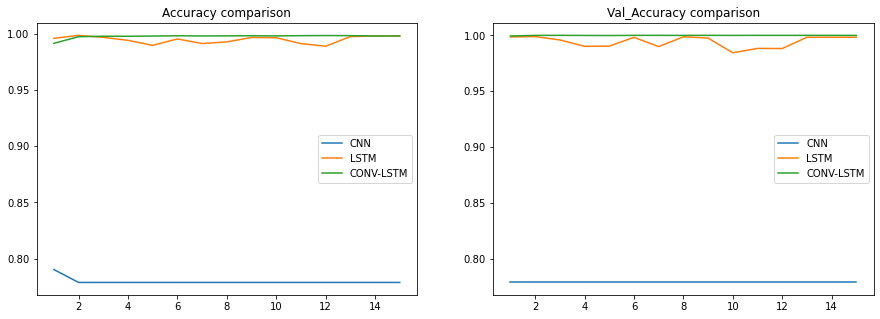

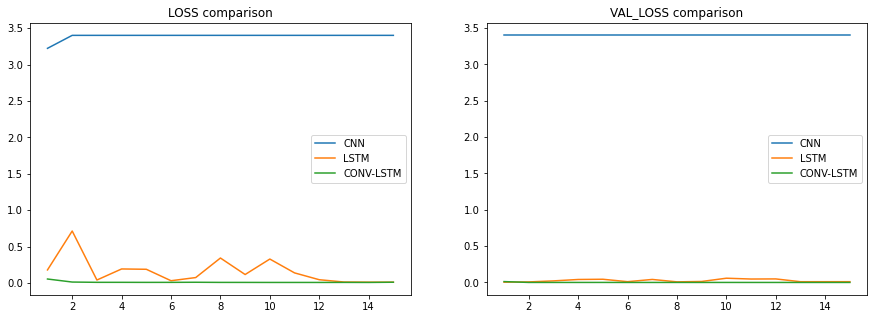

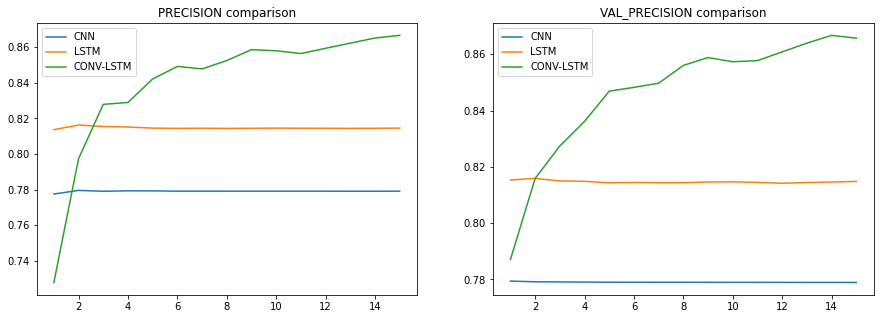

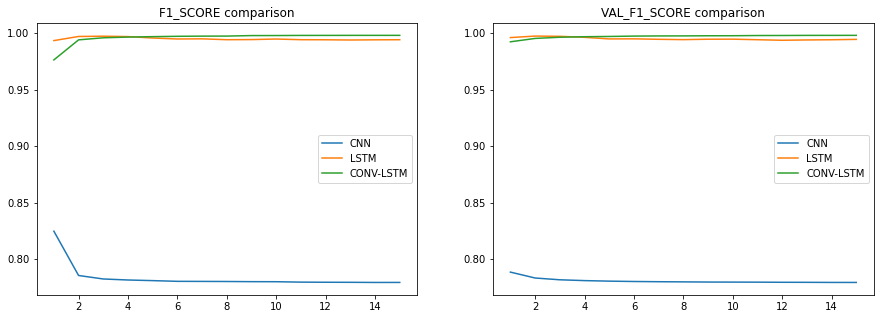

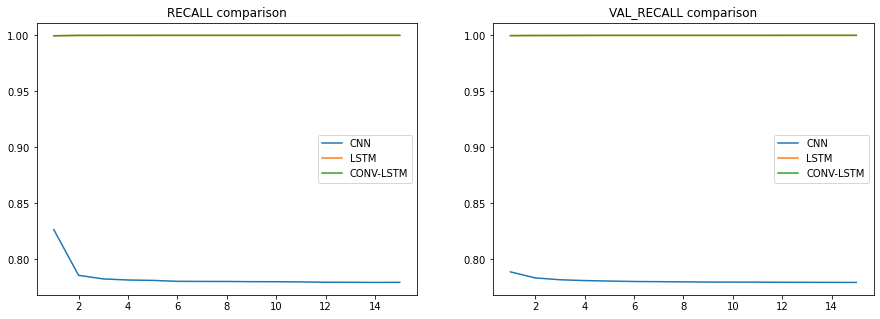

In [75]:
plot_accuracy(x,history_cnn,history_LSTM,history_CONVlstm)
plot_loss(x,history_cnn,history_LSTM,history_CONVlstm)
plot_precision(x,history_cnn,history_LSTM,history_CONVlstm)
plot_f1score(x,history_cnn,history_LSTM,history_CONVlstm)
plot_recall(x,history_cnn,history_LSTM,history_CONVlstm)

In [76]:

n_features = X_Probe_reduced.shape[1]

oe_enc = OneHotEncoder()
Y_Probe = oe_enc.fit_transform(np.array(Y_Probe).reshape(-1,1))
X_train,X_test,Y_train,Y_test = train_test_split(X_Probe_reduced,Y_Probe.toarray(),stratify=Y_Probe.toarray())
X_train = X_train.reshape((X_train.shape[0],  n_steps, n_features))
X_test = X_test.reshape((X_test.shape[0] , n_steps, n_features))

CNNclassifier =CNNmodel(n_steps, n_features,n_outputs)
history_cnn = CNNclassifier.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=epochs, verbose=verbose,batch_size= batch_size)

LSTMclassifier =LSTMmodel(n_steps, n_features,n_outputs)
history_LSTM = LSTMclassifier.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=epochs, verbose=verbose,batch_size= batch_size)

X_train = np.array(X_train).reshape((X_train.shape[0], 1, n_steps, n_features))
X_test = np.array(X_test).reshape((X_test.shape[0] ,1, n_steps, n_features))
CONVlstmclassifier = CONVlstm(n_steps,n_features,n_outputs)
history_CONVlstm = CONVlstmclassifier.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=epochs, verbose=verbose,batch_size= batch_size)

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 1, 12)             300       
_________________________________________________________________
flatten_3 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 22        
Total params: 452
Trainable params: 452
Non-trainable params: 0
_________________________________________________________________
None
Train on 89242 samples, validate on 29748 samples
Epoch 1/15
89242/89242 [==============================] - 151s 2ms/step - loss: 4.2402 - accuracy: 0.7241 - precision: 0.7880 - recall: 0.8211 - f1_score: 0.8178 - val_loss: 5.3125 - val_accuracy: 0.6546 - va

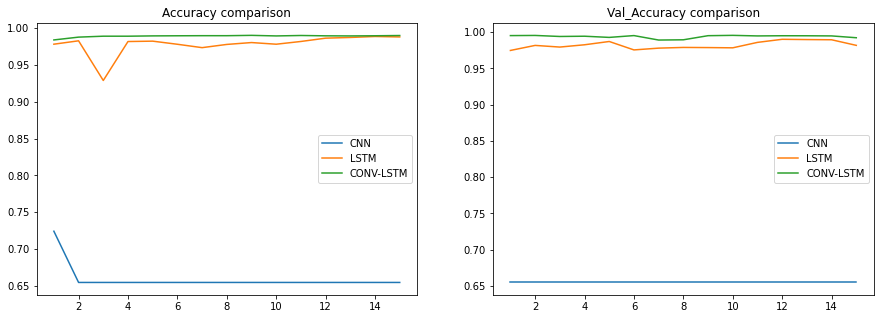

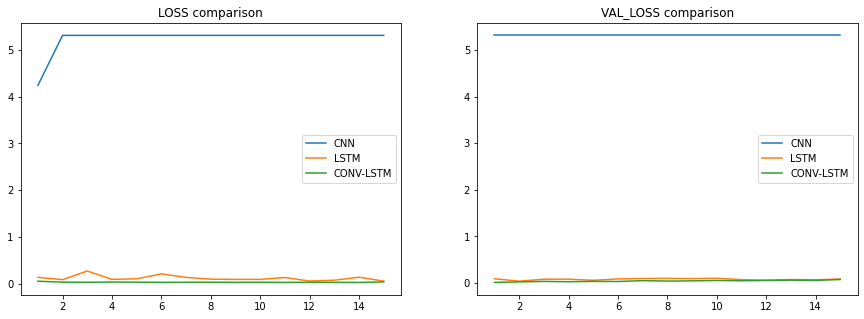

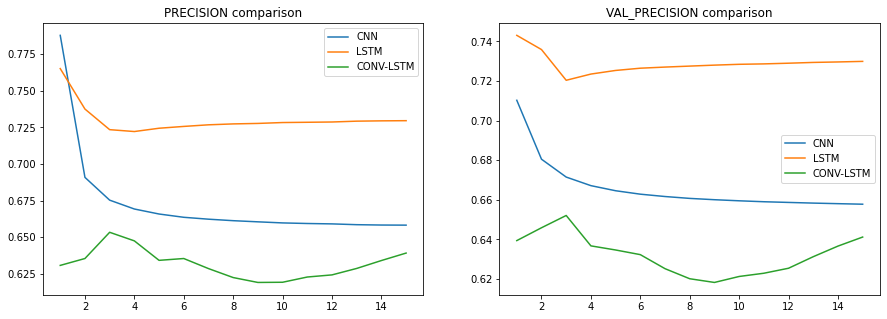

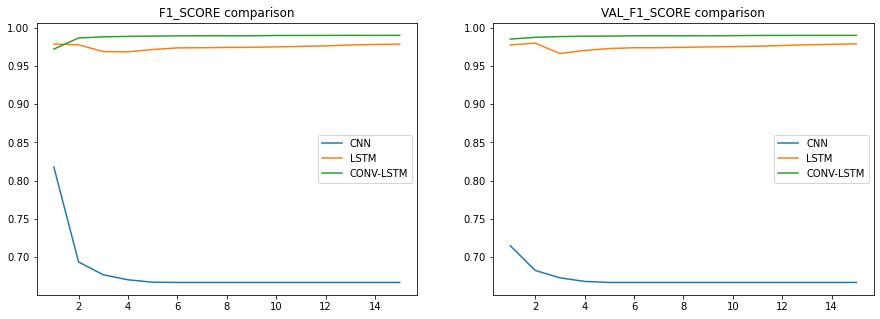

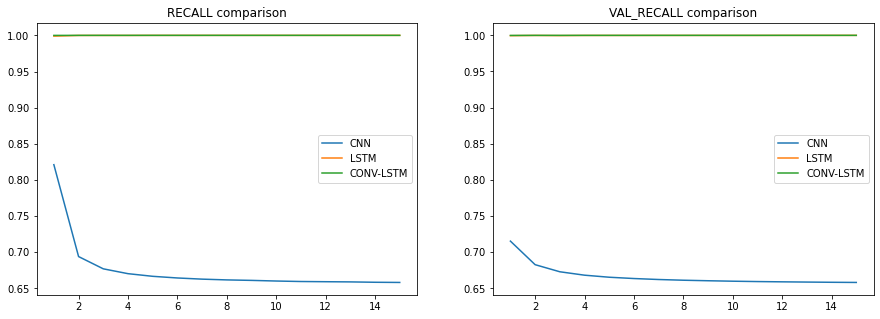

In [77]:
plot_accuracy(x,history_cnn,history_LSTM,history_CONVlstm)
plot_loss(x,history_cnn,history_LSTM,history_CONVlstm)
plot_precision(x,history_cnn,history_LSTM,history_CONVlstm)
plot_f1score(x,history_cnn,history_LSTM,history_CONVlstm)
plot_recall(x,history_cnn,history_LSTM,history_CONVlstm)

In [78]:

n_features = X_R2L_reduced.shape[1]

oe_enc = OneHotEncoder()
Y_R2L = oe_enc.fit_transform(np.array(Y_R2L).reshape(-1,1))
X_train,X_test,Y_train,Y_test = train_test_split(X_R2L_reduced,Y_R2L.toarray(),stratify=Y_R2L.toarray())
X_train = X_train.reshape((X_train.shape[0],  n_steps, n_features))
X_test = X_test.reshape((X_test.shape[0] , n_steps, n_features))

CNNclassifier =CNNmodel(n_steps, n_features,n_outputs)
history_cnn = CNNclassifier.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=epochs, verbose=verbose,batch_size= batch_size)

LSTMclassifier =LSTMmodel(n_steps, n_features,n_outputs)
history_LSTM = LSTMclassifier.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=epochs, verbose=verbose,batch_size= batch_size)

X_train = np.array(X_train).reshape((X_train.shape[0], 1, n_steps, n_features))
X_test = np.array(X_test).reshape((X_test.shape[0] ,1, n_steps, n_features))
CONVlstmclassifier = CONVlstm(n_steps,n_features,n_outputs)
history_CONVlstm = CONVlstmclassifier.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=epochs, verbose=verbose,batch_size= batch_size)




Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 1, 12)             336       
_________________________________________________________________
flatten_5 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 10)                130       
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 22        
Total params: 488
Trainable params: 488
Non-trainable params: 0
_________________________________________________________________
None
Train on 59260 samples, validate on 19754 samples
Epoch 1/15
59260/59260 [==============================] - 103s 2ms/step - loss: 0.2190 - accuracy: 0.9857 - precision: 0.9328 - recall: 0.9856 - f1_score: 0.9850 - val_loss: 0.2195 - val_accuracy: 0.9857 - va

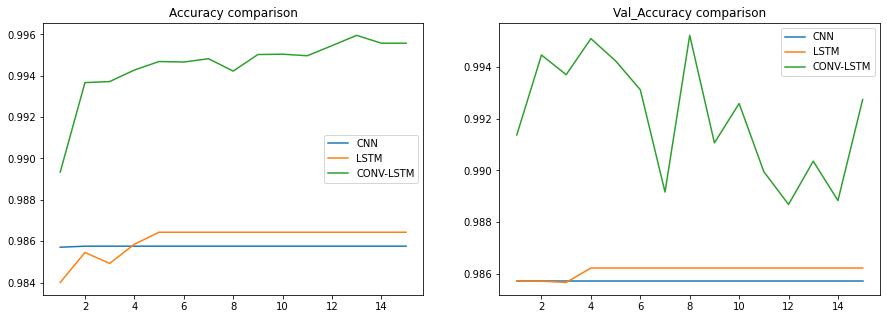

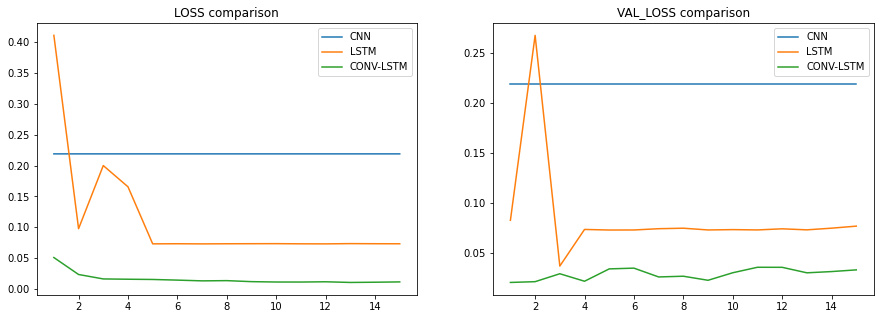

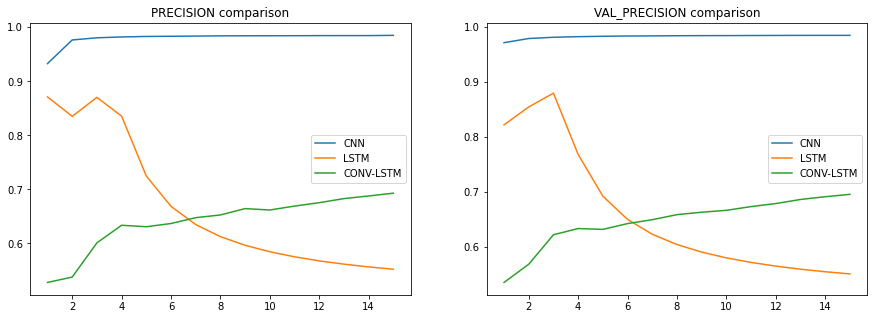

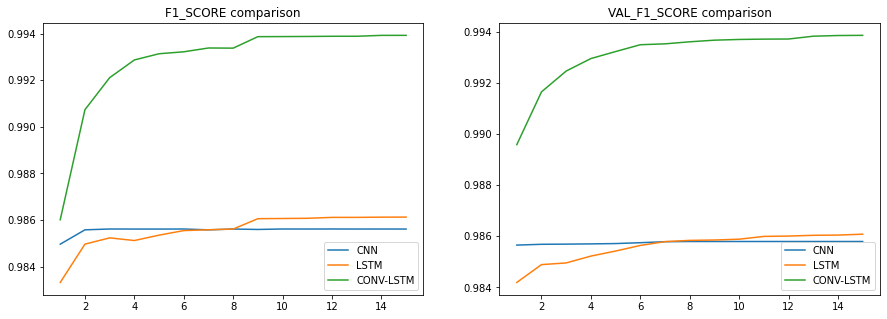

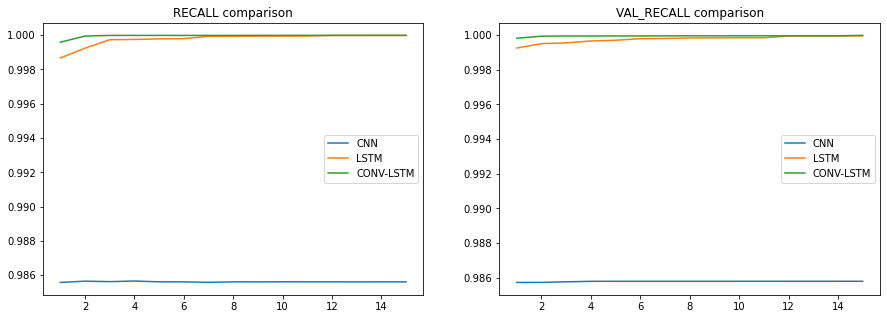

In [79]:
plot_accuracy(x,history_cnn,history_LSTM,history_CONVlstm)
plot_loss(x,history_cnn,history_LSTM,history_CONVlstm)
plot_precision(x,history_cnn,history_LSTM,history_CONVlstm)
plot_f1score(x,history_cnn,history_LSTM,history_CONVlstm)
plot_recall(x,history_cnn,history_LSTM,history_CONVlstm)

In [80]:

n_features = X_U2R_reduced.shape[1]

oe_enc = OneHotEncoder()
Y_U2R = oe_enc.fit_transform(np.array(Y_U2R).reshape(-1,1))
X_train,X_test,Y_train,Y_test = train_test_split(X_U2R_reduced,Y_U2R.toarray(),stratify=Y_U2R.toarray())
X_train = X_train.reshape((X_train.shape[0],  n_steps, n_features))
X_test = X_test.reshape((X_test.shape[0] , n_steps, n_features))

CNNclassifier =CNNmodel(n_steps, n_features,n_outputs)
history_cnn = CNNclassifier.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=epochs, verbose=verbose,batch_size= batch_size)

LSTMclassifier =LSTMmodel(n_steps, n_features,n_outputs)
history_LSTM = LSTMclassifier.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=epochs, verbose=verbose,batch_size= batch_size)

X_train = np.array(X_train).reshape((X_train.shape[0], 1, n_steps, n_features))
X_test = np.array(X_test).reshape((X_test.shape[0] ,1, n_steps, n_features))
CONVlstmclassifier = CONVlstm(n_steps,n_features,n_outputs)
history_CONVlstm = CONVlstmclassifier.fit(X_train, Y_train,validation_data=(X_test,Y_test), epochs=epochs, verbose=verbose,batch_size= batch_size)

Model: "CNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_7 (Conv1D)            (None, 1, 12)             336       
_________________________________________________________________
flatten_7 (Flatten)          (None, 12)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                130       
_________________________________________________________________
dense_14 (Dense)             (None, 2)                 22        
Total params: 488
Trainable params: 488
Non-trainable params: 0
_________________________________________________________________
None
Train on 58458 samples, validate on 19486 samples
Epoch 1/15
58458/58458 [==============================] - 110s 2ms/step - loss: 0.0111 - accuracy: 0.9993 - precision: 0.9919 - recall: 0.9991 - f1_score: 0.9991 - val_loss: 0.0110 - val_accuracy: 0.9993 - va

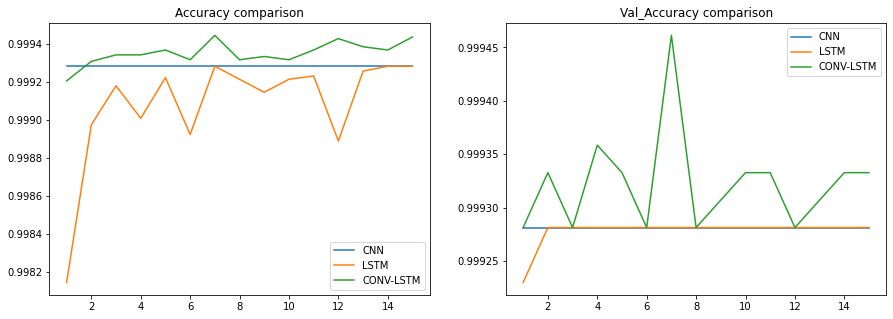

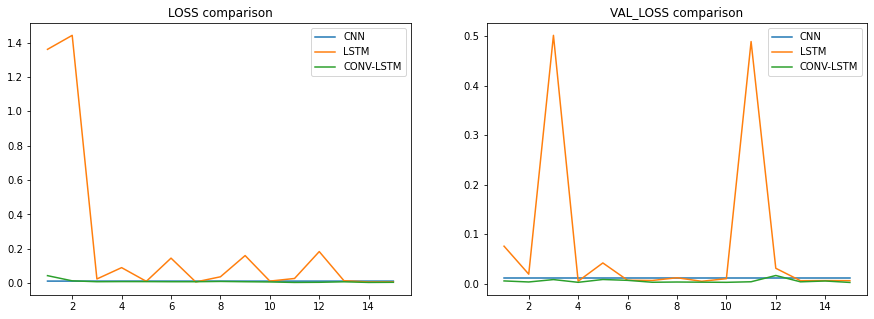

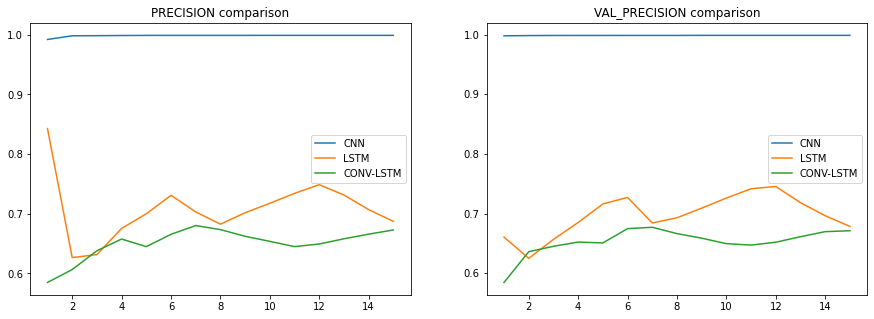

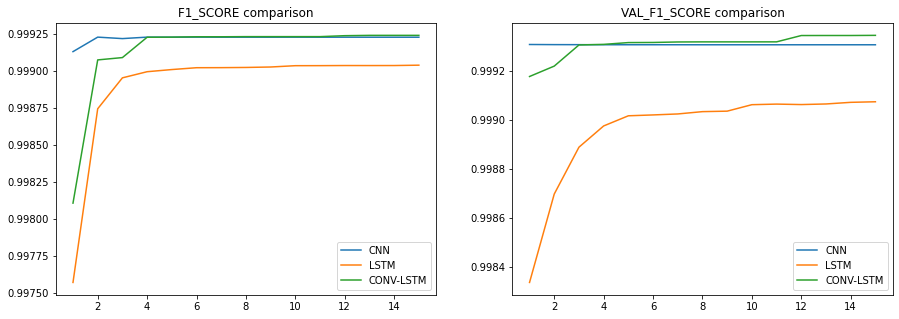

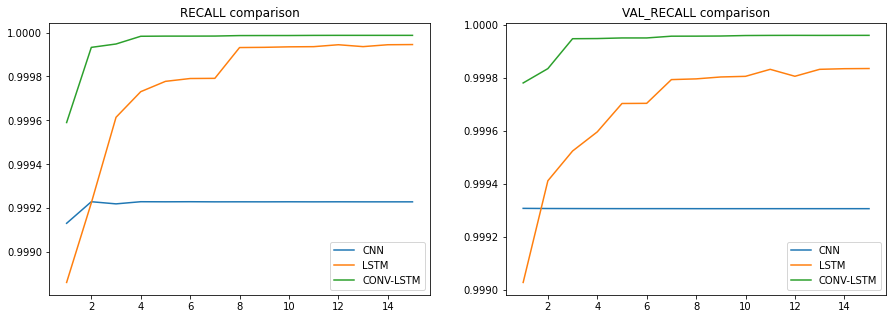

In [81]:
plot_accuracy(x,history_cnn,history_LSTM,history_CONVlstm)
plot_loss(x,history_cnn,history_LSTM,history_CONVlstm)
plot_precision(x,history_cnn,history_LSTM,history_CONVlstm)
plot_f1score(x,history_cnn,history_LSTM,history_CONVlstm)
plot_recall(x,history_cnn,history_LSTM,history_CONVlstm)